# Importing Necessary Libraries

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly, shap
import plotly.express as px
import plotly.io as pio
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('cirrhosis.csv', index_col='ID')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Target
ID,,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,Yes
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,No
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,Yes
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,Yes
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,No


In [106]:
df.shape

(418, 20)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 1 to 418
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage          

In [108]:
df['Stage']=df['Stage'].astype('object')

This data set has about 19 features. These features are related to the patient’s details like age, sex, etc. and patient’s blood tests like prothrombin, triglycerides, platelets levels, etc. All these factors help in understanding a patient’s chances of liver cirrhosis.

In [109]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000


## Count Missing Values.

In [110]:
df.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
Target             6
dtype: int64

In [111]:
df['Stage'].value_counts()


Stage
3.0    155
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 1 to 418
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage          

# Handling Missing Values
- We could just get rid of all examples with NA values, but in this case our case of small dataset so we cannot afford that operation. 
1. For the numerical type we can use mean.
2. For Categorical type we will impute the most frequent class.

In [113]:
# For Numerical Features
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
dtype: int64

In [114]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].mean(), inplace=True)

df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
dtype: int64

# For Categorical Features


In [115]:
df.select_dtypes(include=('object')).isna().sum()

Status            0
Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
Stage             6
Target            6
dtype: int64

In [116]:
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)
    
df.select_dtypes(include=('object')).isna().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
Target          0
dtype: int64

In [117]:
df['Stage'].value_counts()

Stage
3.0    161
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 1 to 418
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           418 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        418 non-null    object 
 6   Hepatomegaly   418 non-null    object 
 7   Spiders        418 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    418 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         418 non-null    float64
 13  Alk_Phos       418 non-null    float64
 14  SGOT           418 non-null    float64
 15  Tryglicerides  418 non-null    float64
 16  Platelets      418 non-null    float64
 17  Prothrombin    418 non-null    float64
 18  Stage          

# Exploratory Data Analysis
First lets take a look at how many examples per calss do we have in our dataset.

In [119]:
df['Stage'].value_counts()

Stage
3.0    161
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Example Per Class')

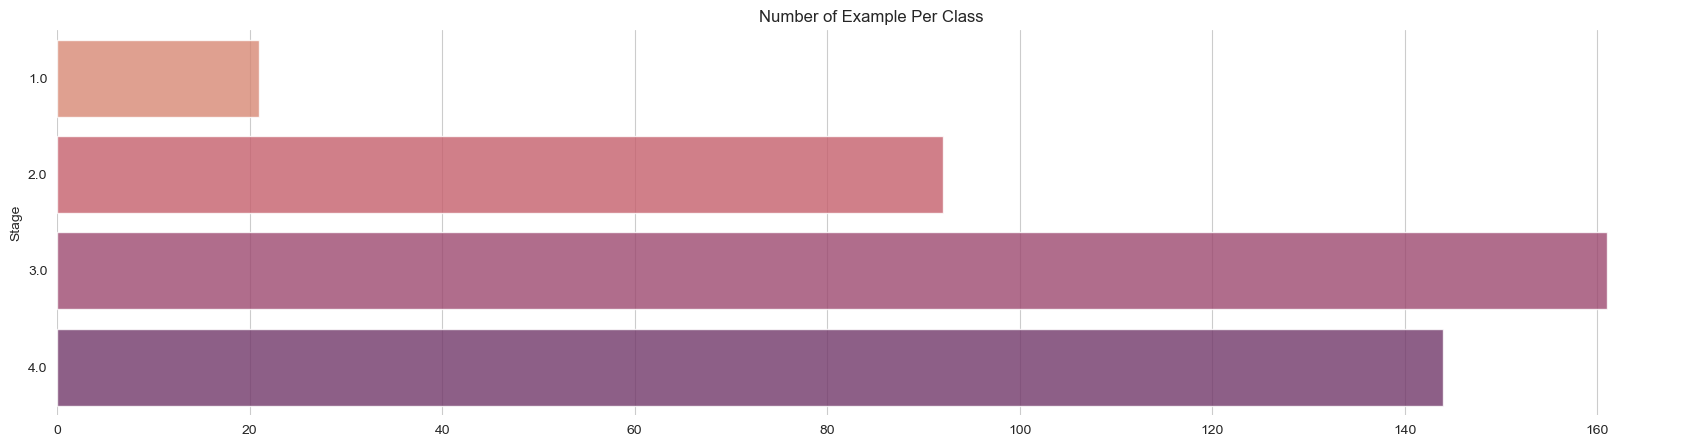

In [120]:
plt.figure(figsize=(21,5))
sns.countplot(y=df['Stage'], palette="flare", alpha=0.8, )
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Number of Example Per Class')

As we can observe we have class imbalances in our dataset i.e some classes have more examples than other. This could make it difficult for our model to train and achieve desired score.

# Setting up Target and Features

### For this demonstration we will keep things simple by predicting one of the two classes  i.e (Cirrhosis and No Cirrhois).

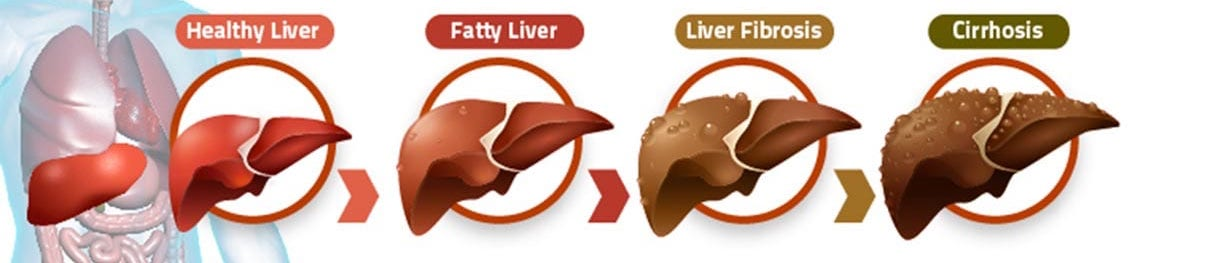

In [121]:
# Converting Target categories into intigers 1 for Cirrhosis, 0 otherwise
df['Stage'] = np.where(df['Stage'] == 4, 1, 0)


In [122]:
df['Stage'].value_counts()

Stage
0    274
1    144
Name: count, dtype: int64

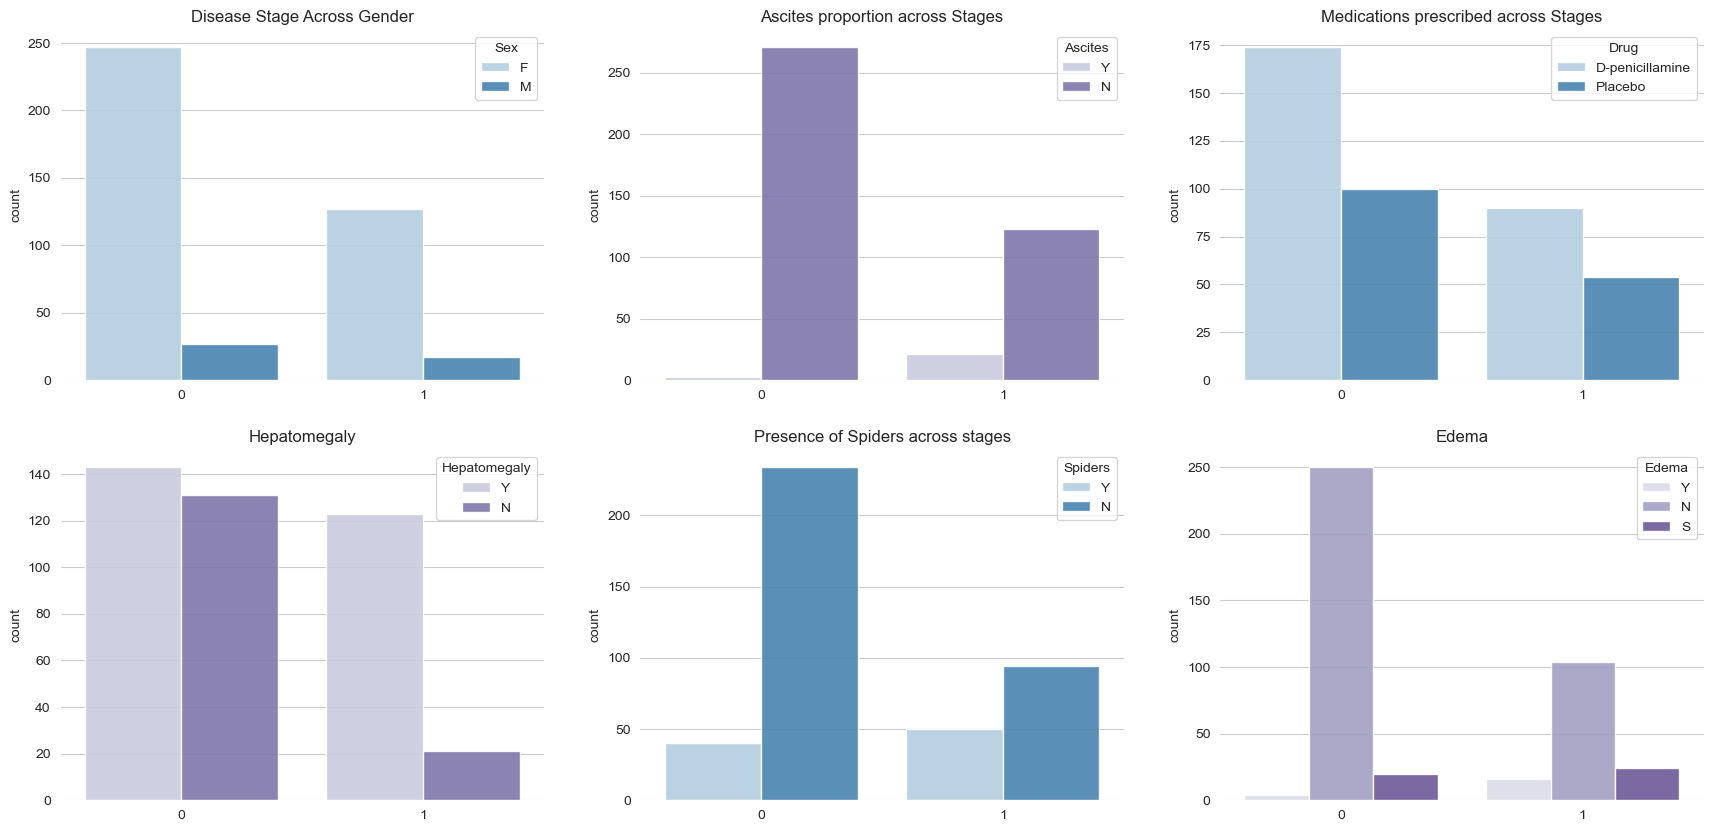

In [123]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=df['Stage'], hue=df['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Disease Stage Across Gender')

plt.subplot(2,3,2)
sns.countplot(x=df['Stage'], hue=df['Ascites'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Ascites proportion across Stages')

plt.subplot(2,3,3)
sns.countplot(x=df['Stage'], hue=df['Drug'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across Stages');

plt.subplot(2,3,4)
sns.countplot(x=df['Stage'], hue=df['Hepatomegaly'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Hepatomegaly');

plt.subplot(2,3,5)
sns.countplot(x=df['Stage'], hue=df['Spiders'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders across stages');

plt.subplot(2,3,6)
sns.countplot(x=df['Stage'], hue=df['Edema'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Edema');

There are some interesting insights if we observe closely. Take the case at Ascites, we observe that the rist of disease is higher with increase in Ascites. also presence of spiders has a positive relation with disease risk.

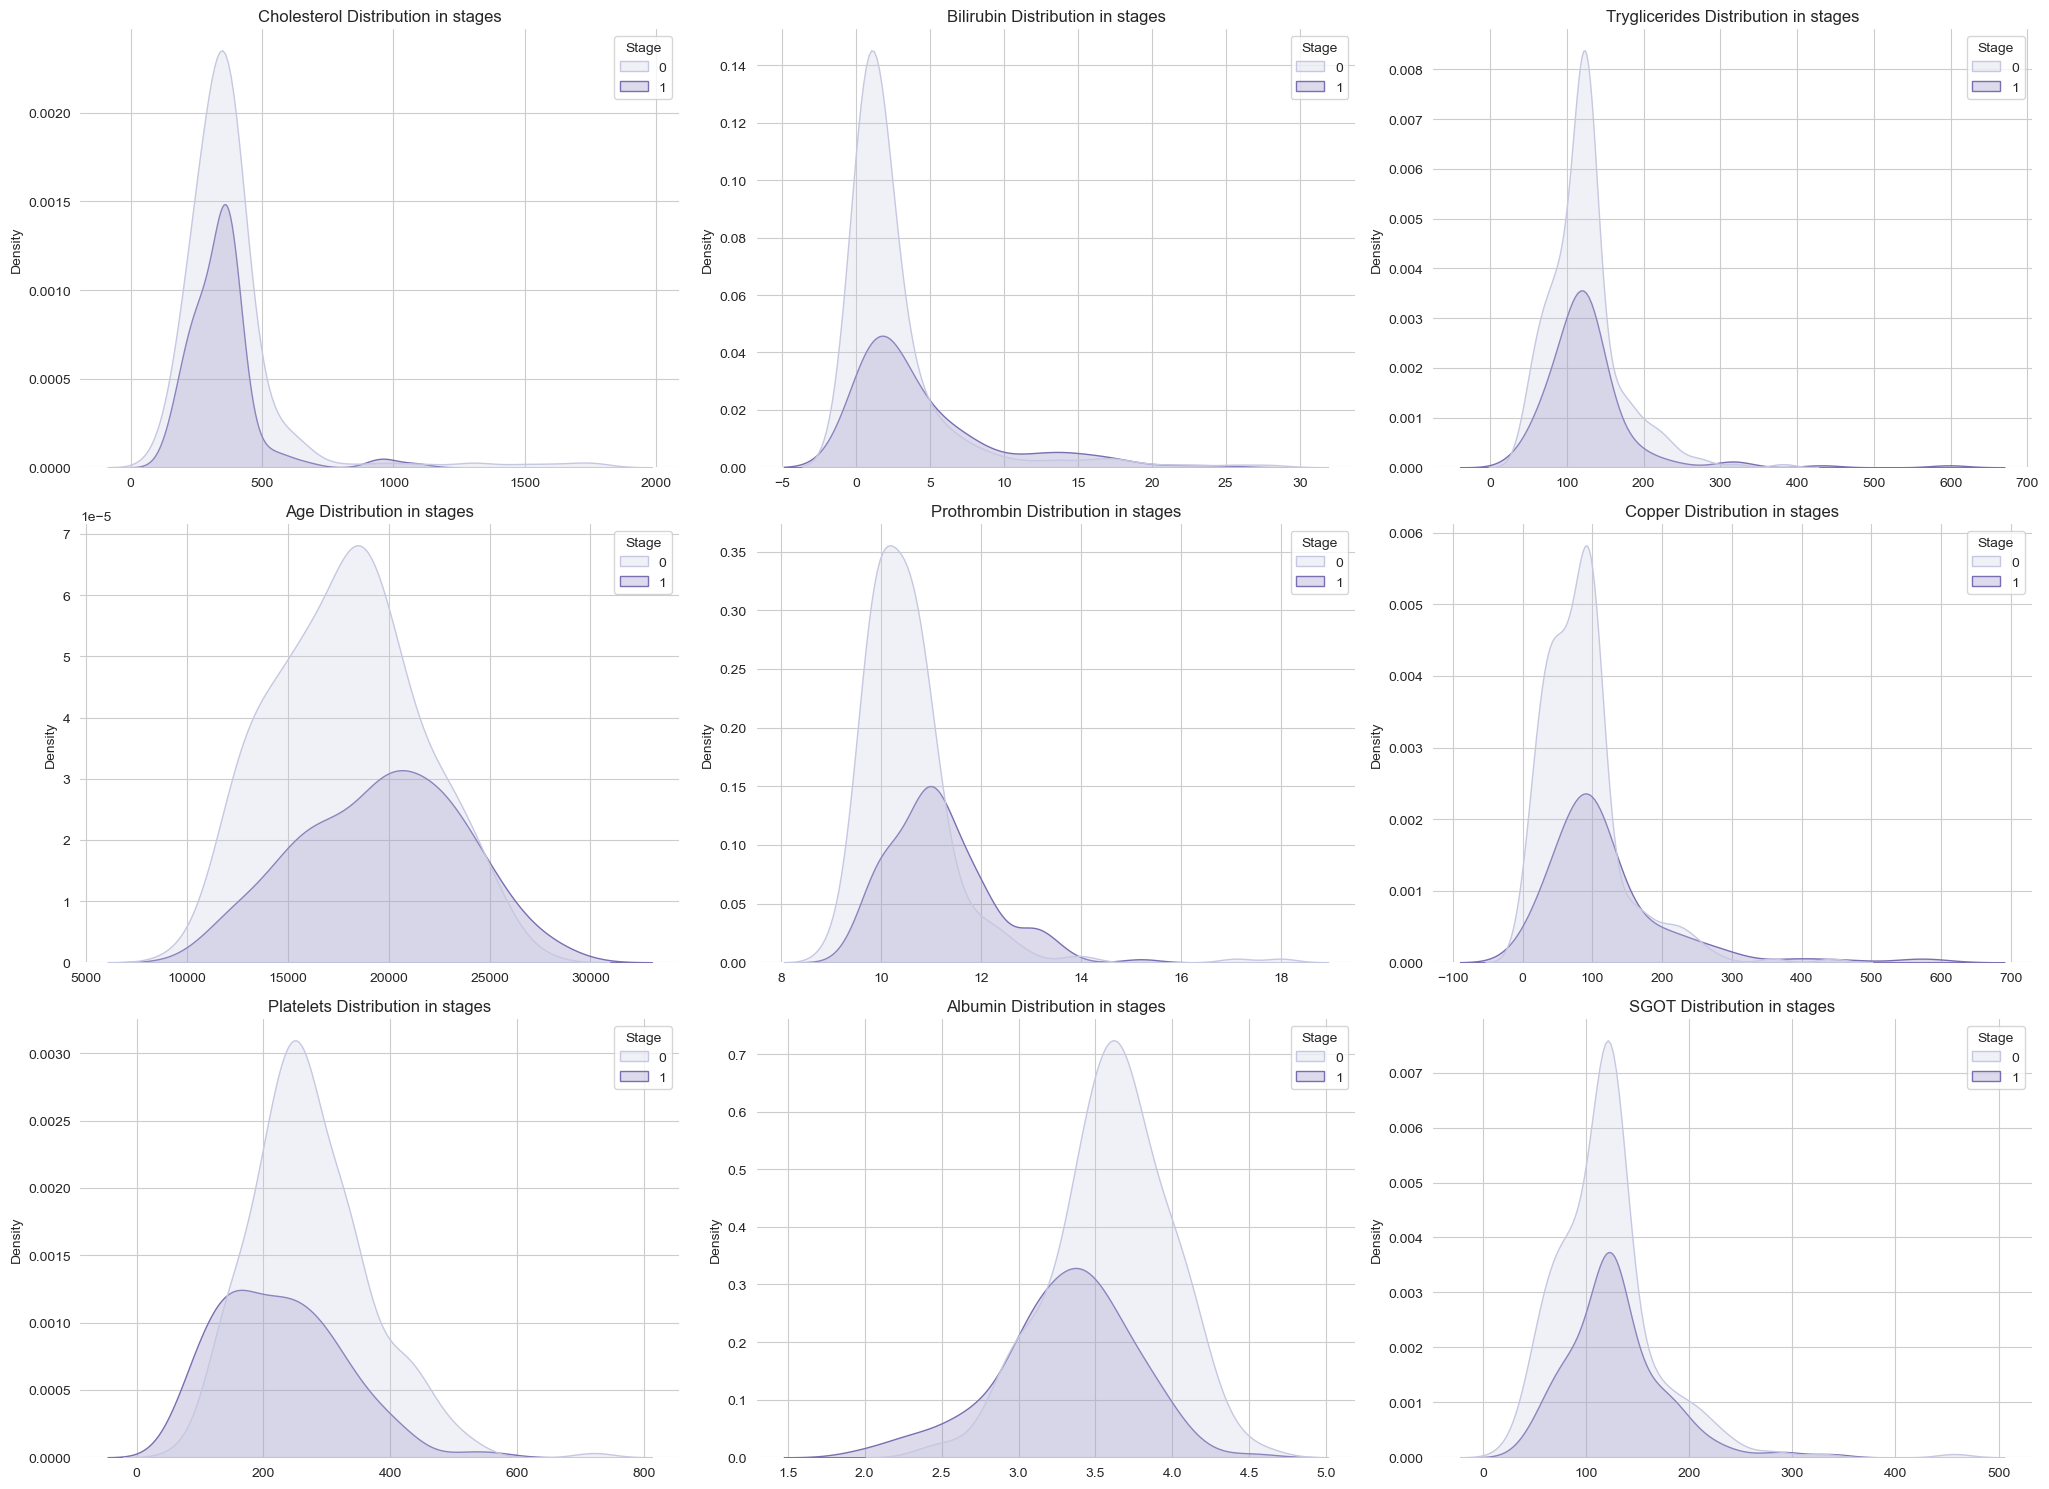

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20.6,15))

# Define a list of variables
variables = ['Cholesterol', 'Bilirubin', 'Tryglicerides', 'Age', 'Prothrombin', 'Copper', 'Platelets', 'Albumin', 'SGOT']

for i, variable in enumerate(variables, start=1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df, x=variable, hue='Stage', fill=True, palette='Purples', common_norm=True)
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
    plt.xlabel('')
    plt.title(f'{variable} Distribution in stages')

plt.tight_layout()
plt.show()


In [125]:
import plotly.express as px

# Convert the set to a list when selecting columns
columns_to_select = ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

px.box(
    data_frame=df[columns_to_select].melt(),
    y='value',
    facet_col='variable',
    color='variable',
    template='ggplot2',
    title="Boxplots for Outlier Detection"
).for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])).show()


In [126]:
# Convert the set to a list when selecting columns
columns_to_select = ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

normalized_df = (df[columns_to_select] - df[columns_to_select].mean()) / df[columns_to_select].std()


In [127]:
# Normalization to visualize better
px.box(
    data_frame= normalized_df.melt(),
    y= 'value',
    facet_col= 'variable',
    color= 'variable',
    notched= True,
    template= 'ggplot2',
    title= "Boxplots for Outlier Detection (Normalized)"
    
).for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])).show()

In [128]:
px.histogram(
    data_frame= normalized_df.melt(),
    x= 'value',
    nbins= 30,
    facet_col= 'variable',
    color= 'variable',
    template= 'ggplot2',
    title= "Histograms for Outlier Detection (Normalized)"
    
).for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])).show()

- Many outliers appear to be present based off of these plots.
- A higher concentration of these outliers fall between 2 and 3 standard deviations from their respective means.

In [129]:
px.histogram(
    normalized_df[normalized_df >3].melt(),
    x= 'value',
    facet_col= 'variable',
    color= 'variable',
    nbins= 1,
    template= 'ggplot2',
    title= "Number of Outliers with Z-score > 3"
    
).for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])).show()

In [130]:
# df[(normalized_df >3).any(1)].shape
df[(normalized_df > 3).any(axis=1)].shape

(45, 20)

# Data Preprocessing

In [131]:
# Removing Outliers for Better Model Performance
df = df[~(normalized_df >3).any(axis=1)]

In [132]:
df.shape

(373, 20)

In [133]:
# Encoding
df['Age'] = (df['Age']/365).round(1)
df['Sex'] = df['Sex'].replace({'M':0, 'F':1})                                # Male : 0 , Female :1
df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1   
df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1   
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
df['Edema'] = df['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
df['Status'] = df['Status'].replace({'C':0, 'CL':1, 'D':-1})                 # 'C':0, 'CL':1, 'D':-1

In [134]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Target
ID,,,,,,,,,,,,,,,,,,,,
1,400,-1,0,58.8,1,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,1,Yes
2,4500,0,0,56.5,1,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0,No
3,1012,-1,0,70.1,0,0,0,0,-1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,1,Yes
4,1925,-1,0,54.8,1,0,1,1,-1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,1,Yes
5,1504,1,1,38.1,1,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,0,No


In [135]:
df.drop(columns='Target').corr()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,0.299712,0.048499,-0.119862,0.005152,-0.230097,-0.300770,-0.160962,0.014977,-0.392362,-0.110764,0.445799,-0.390469,0.024005,-0.203199,-0.128157,0.172791,-0.168014,-0.341289
Status,0.299712,1.000000,-0.012289,-0.314892,0.138341,-0.287718,-0.178574,-0.147777,-0.015948,-0.322166,-0.087775,0.201944,-0.287333,-0.153599,-0.192222,-0.081629,0.235704,-0.387419,-0.266917
Drug,0.048499,-0.012289,1.000000,-0.126908,-0.002666,0.027167,-0.134794,0.176096,0.073981,0.074044,-0.127605,0.007004,-0.006392,-0.116819,-0.016070,-0.004627,0.061993,0.096875,0.043425
Age,-0.119862,-0.314892,-0.126908,1.000000,-0.134901,0.164949,0.165929,-0.094885,-0.068971,0.013527,-0.065109,-0.188449,0.089074,0.027022,-0.127605,0.069945,-0.129145,0.121706,0.207813
Sex,0.005152,0.138341,-0.002666,-0.134901,1.000000,-0.002594,-0.056156,0.113117,0.010427,0.008587,-0.051700,-0.037022,-0.253556,-0.025818,-0.007033,-0.080247,0.059446,-0.085778,-0.038561
Ascites,-0.230097,-0.287718,0.027167,0.164949,-0.002594,1.000000,0.076511,0.174839,0.325263,0.254597,-0.144675,-0.284430,0.155929,0.041148,0.026586,0.039851,-0.163277,0.281282,0.245240
Hepatomegaly,-0.300770,-0.178574,-0.134794,0.165929,-0.056156,0.076511,1.000000,0.088569,-0.061269,0.214837,0.047836,-0.275135,0.318053,0.163192,0.148257,0.168254,-0.262290,0.191812,0.339675
Spiders,-0.160962,-0.147777,0.176096,-0.094885,0.113117,0.174839,0.088569,1.000000,0.082174,0.193805,-0.086221,-0.144491,0.172714,0.013012,0.110789,-0.139991,-0.146653,0.233296,0.202907
Edema,0.014977,-0.015948,0.073981,-0.068971,0.010427,0.325263,-0.061269,0.082174,1.000000,0.036162,-0.019683,-0.063455,-0.004834,-0.011415,-0.005542,-0.058184,0.010049,0.008323,-0.021858
Bilirubin,-0.392362,-0.322166,0.074044,0.013527,0.008587,0.254597,0.214837,0.193805,0.036162,1.000000,0.301652,-0.296295,0.425259,0.204857,0.364582,0.275720,-0.083850,0.277246,0.171707


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 1 to 418
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         373 non-null    int64  
 1   Status         373 non-null    int64  
 2   Drug           373 non-null    int64  
 3   Age            373 non-null    float64
 4   Sex            373 non-null    int64  
 5   Ascites        373 non-null    int64  
 6   Hepatomegaly   373 non-null    int64  
 7   Spiders        373 non-null    int64  
 8   Edema          373 non-null    int64  
 9   Bilirubin      373 non-null    float64
 10  Cholesterol    373 non-null    float64
 11  Albumin        373 non-null    float64
 12  Copper         373 non-null    float64
 13  Alk_Phos       373 non-null    float64
 14  SGOT           373 non-null    float64
 15  Tryglicerides  373 non-null    float64
 16  Platelets      373 non-null    float64
 17  Prothrombin    373 non-null    float64
 18  Stage          

## Note :- We will not be using 'Status' and 'N_days' as our features since this will cause data Leakage.

In [137]:
# Setting up Features and Target
X = df.drop(['Status', 'N_Days', 'Stage','Target'], axis=1)
y = df.pop('Stage')

In [138]:
y

ID
1      1
2      0
3      1
4      1
5      0
      ..
414    0
415    1
416    0
417    0
418    1
Name: Stage, Length: 373, dtype: int32

In [139]:
y.value_counts()

Stage
0    246
1    127
Name: count, dtype: int64

In [140]:
X

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
ID,,,,,,,,,,,,,,,,
1,0,58.8,1,1,1,1,1,14.5,261.000000,2.60,156.000000,1718.000000,137.950000,172.000000,190.0,12.2
2,0,56.5,1,0,1,1,0,1.1,302.000000,4.14,54.000000,7394.800000,113.520000,88.000000,221.0,10.6
3,0,70.1,0,0,0,0,-1,1.4,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,151.0,12.0
4,0,54.8,1,0,1,1,-1,1.8,244.000000,2.54,64.000000,6121.800000,60.630000,92.000000,183.0,10.3
5,1,38.1,1,0,1,1,0,3.4,279.000000,3.53,143.000000,671.000000,113.150000,72.000000,136.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,0,67.0,1,0,1,0,0,1.2,369.510563,2.96,97.648387,1982.655769,122.556346,124.702128,174.0,10.9
415,0,39.0,1,0,1,0,0,0.9,369.510563,3.83,97.648387,1982.655769,122.556346,124.702128,180.0,11.2
416,0,57.0,1,0,1,0,0,1.6,369.510563,3.42,97.648387,1982.655769,122.556346,124.702128,143.0,9.9


In [141]:
y

ID
1      1
2      0
3      1
4      1
5      0
      ..
414    0
415    1
416    0
417    0
418    1
Name: Stage, Length: 373, dtype: int32

In [142]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your features and 'y' is the target variable
# It's also assumed that 'X' and 'y' have been prepared


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# It's a good practice to scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Now, 'X_resampled' and 'y_resampled' have a balanced class distribution
# You can proceed with training your model using these resampled datasets


In [143]:
y_resampled.value_counts()

Stage
1    175
0    175
Name: count, dtype: int64

In [144]:
X = pd.DataFrame(X_resampled)
y = pd.DataFrame(y_resampled)


In [145]:
y.shape

(350, 1)

In [146]:
y=y.squeeze()

In [147]:
y.shape

(350,)

# **Note**: The Notebook has been re-run for final submissions maybe scores will be deviated little bit but the overall analaysis is same 

# Model Selection.
***Create Baseline First***

In [148]:
log_model = LogisticRegression(max_iter=5000, solver='saga')
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

acc=[]
def training(train, test, fold_no):
    X_train = train
    y_train = y.iloc[train_index]
    X_test = test
    y_test = y.iloc[test_index]
#     X_test = X_test.replace({'Yes': 1, 'No': 0})
#     y_test = y_test.replace({'Yes': 1, 'No': 0})
#     print(X_test.columns)
    log_model.fit(X_train, y_train)
    score = log_model.score(X_test,y_test)
    acc.append(score)
    print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
    train = X.iloc[train_index,:-1]
    test = X.iloc[test_index,:-1]
    training(train, test, fold_no)
    fold_no += 1
print()
print('Logestic Regression Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.8571428571428571
For Fold 2 the accuracy is 0.7428571428571429
For Fold 3 the accuracy is 0.7142857142857143
For Fold 4 the accuracy is 0.6857142857142857
For Fold 5 the accuracy is 0.6857142857142857
For Fold 6 the accuracy is 0.7142857142857143
For Fold 7 the accuracy is 0.7142857142857143
For Fold 8 the accuracy is 0.7428571428571429
For Fold 9 the accuracy is 0.8
For Fold 10 the accuracy is 0.6571428571428571

Logestic Regression Mean Accuracy =  0.7314285714285715


In [149]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assume X and y are already defined

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Training the logistic regression model
log_model = LogisticRegression(max_iter=5000, solver='saga')
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)


# Calculating and printing accuracy
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy of Logistic Regression (Baseline Model):', accuracy)

# Getting classification report
report = classification_report(y_test, y_pred)
print('\nClassification Report:\n', report)




Accuracy of Logistic Regression (Baseline Model): 0.7571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.75        35
           1       0.74      0.80      0.77        35

    accuracy                           0.76        70
   macro avg       0.76      0.76      0.76        70
weighted avg       0.76      0.76      0.76        70




RandomForest Accuracy: 0.8571428571428571 

RandomForest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85        35
           1       0.82      0.91      0.86        35

    accuracy                           0.86        70
   macro avg       0.86      0.86      0.86        70
weighted avg       0.86      0.86      0.86        70

RandomForest AUC: 0.9236734693877551 



C:\Users\divya\AppData\Local\Temp\ipykernel_13552\2240718119.py:25: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



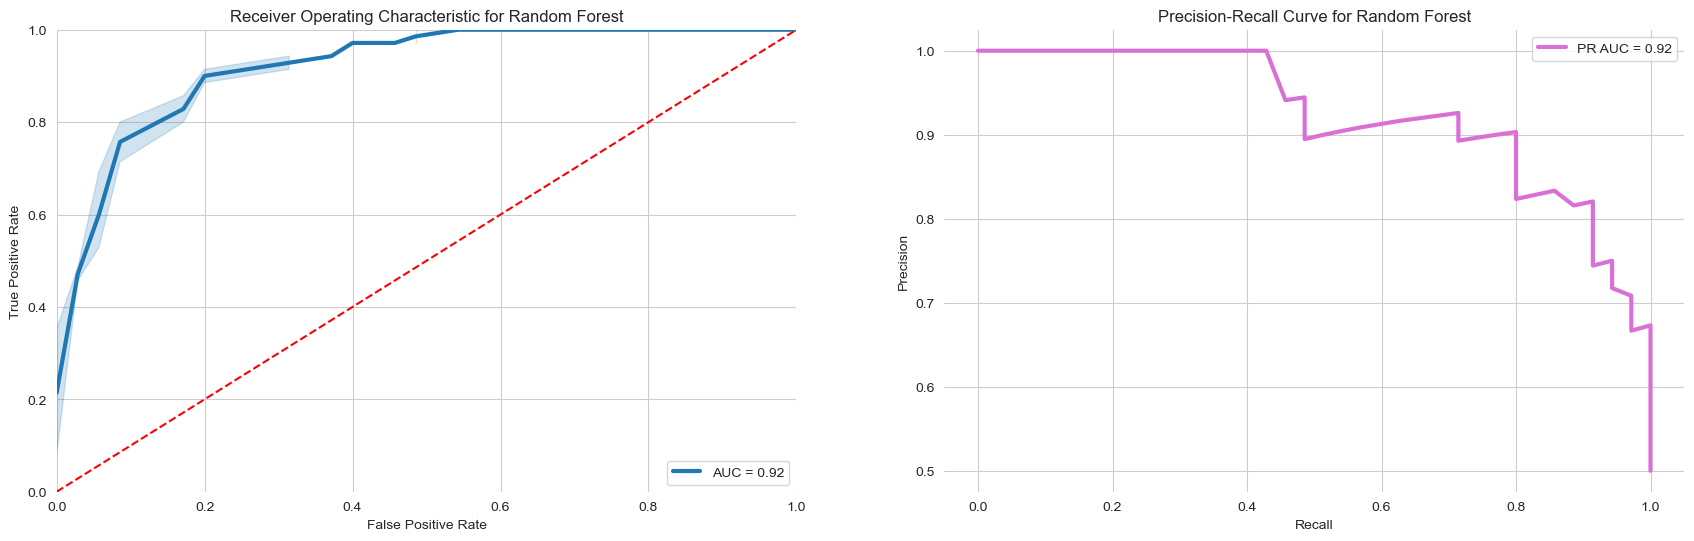

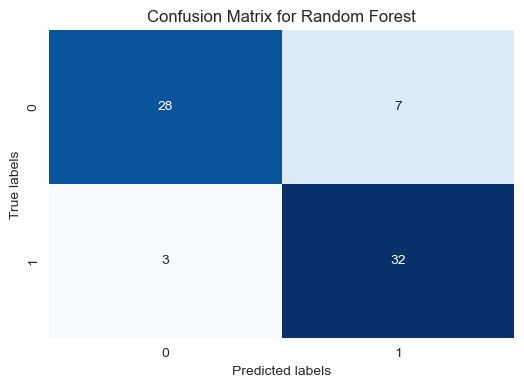

In [150]:


# Assuming X_train, X_test, y_train, y_test are already defined

# RandomForest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_report = classification_report(y_test, rf_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_pr_auc = auc(rf_recall, rf_precision)
print('\nRandomForest Accuracy:', rf_accuracy,'\n')
print('RandomForest Classification Report:\n', rf_report)
print('RandomForest AUC:', rf_auc,'\n')

sns.set_style('whitegrid')
plt.figure(figsize=(21,6))

# ROC Curve for Random Forest
plt.subplot(1,2,1)
plt.title('Receiver Operating Characteristic for Random Forest')
sns.lineplot(x=rf_fpr, y=rf_tpr, label = 'AUC = %0.2f' % rf_auc, palette='purple', linewidth=3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tick_params(left=False, bottom=False)
sns.despine(top=True, right=True, left=True, bottom=True)

# Precision-Recall Curve for Random Forest
plt.subplot(1,2,2)
plt.plot(rf_recall, rf_precision, linewidth=3, color='orchid', label = 'PR AUC = %0.2f' % rf_pr_auc)
plt.legend(loc = 'best')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')

plt.show()

# Calculate the confusion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()




Decision Trees Accuracy: 0.7285714285714285 

Decision Trees Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.66      0.71        35
           1       0.70      0.80      0.75        35

    accuracy                           0.73        70
   macro avg       0.73      0.73      0.73        70
weighted avg       0.73      0.73      0.73        70

Decision Trees AUC: 0.7285714285714285 



C:\Users\divya\AppData\Local\Temp\ipykernel_13552\1544416734.py:29: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



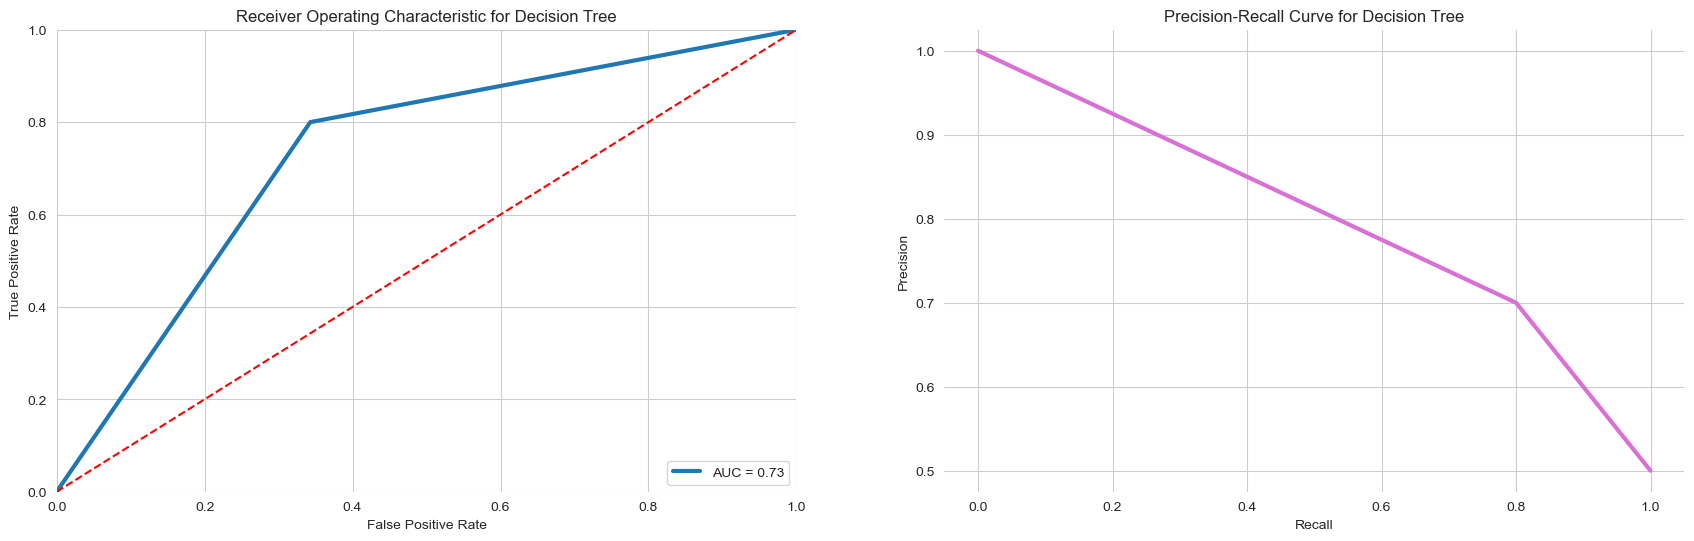

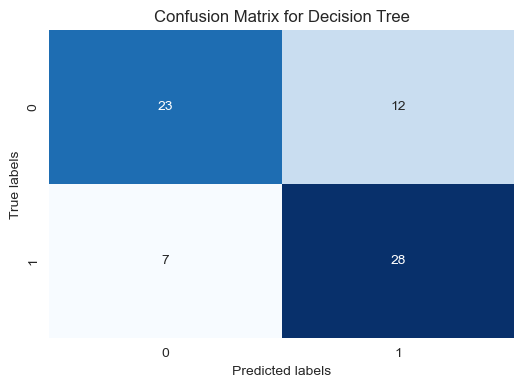

In [151]:
# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_report = classification_report(y_test, dt_y_pred)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_probs = dt_model.predict_proba(X_test)[:, 1]
dt_auc = roc_auc_score(y_test, dt_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_probs)
dt_pr_auc = auc(dt_recall, dt_precision)
print('\nDecision Trees Accuracy:', dt_accuracy,'\n')
print('Decision Trees Classification Report:\n', dt_report)
print ('Decision Trees AUC:',dt_auc,'\n' )
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_roc_auc = roc_auc_score(y_test, dt_probs)

# Calculate Precision-Recall curve
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_probs)

# Plotting
sns.set_style('whitegrid')
plt.figure(figsize=(21,6))

# ROC Curve for Decision Tree
plt.subplot(1,2,1)
plt.title('Receiver Operating Characteristic for Decision Tree')
sns.lineplot(x=dt_fpr, y=dt_tpr, label = 'AUC = %0.2f' % dt_roc_auc, palette='purple', linewidth=3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tick_params(left=False, bottom=False)
sns.despine(top=True, right=True, left=True, bottom=True)

# Precision-Recall Curve for Decision Tree
plt.subplot(1,2,2)
plt.plot(dt_recall, dt_precision, linewidth=3, color='orchid')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.show()

# Calculate the confusion matrix
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(dt_conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()



SVM Accuracy: 0.8285714285714286 

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.81      0.86      0.83        35

    accuracy                           0.83        70
   macro avg       0.83      0.83      0.83        70
weighted avg       0.83      0.83      0.83        70

SVM AUC: 0.9159183673469387 



C:\Users\divya\AppData\Local\Temp\ipykernel_13552\828729224.py:24: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



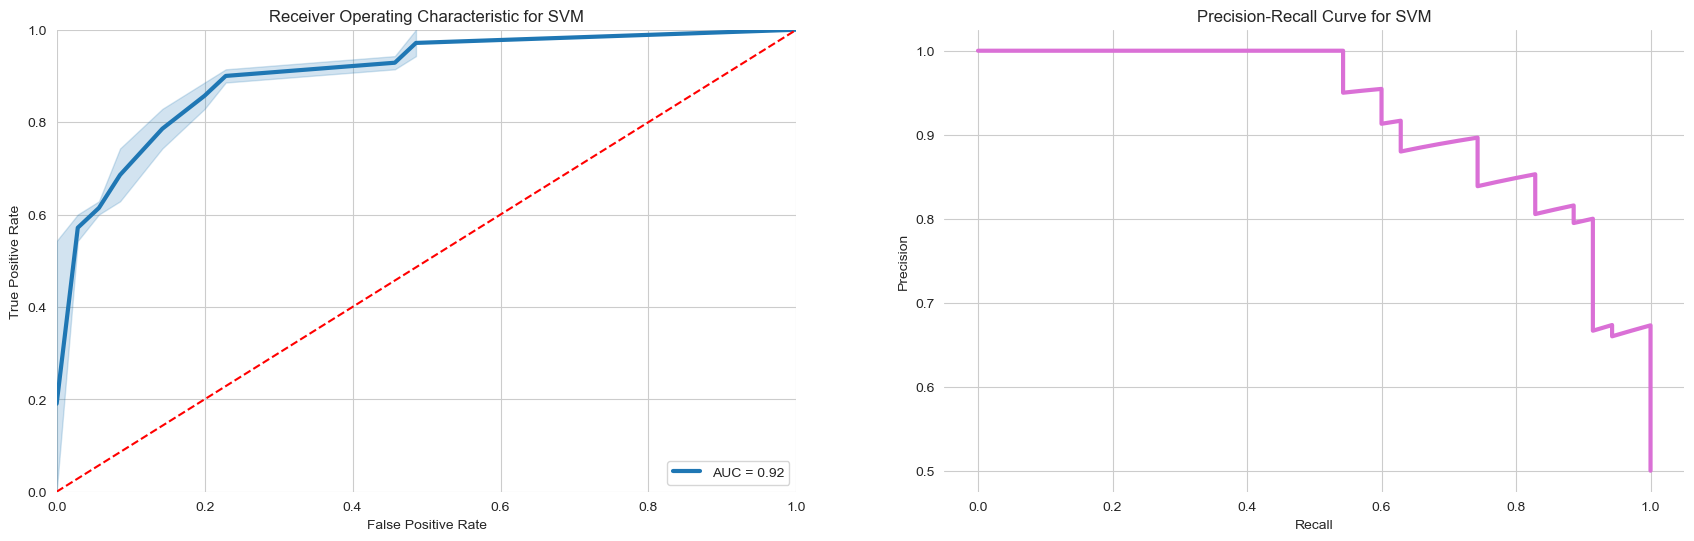

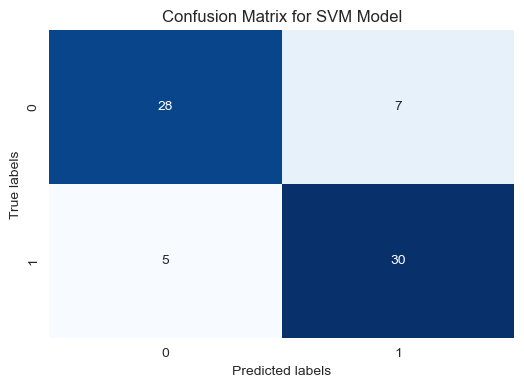

In [152]:
# Support Vector Machines (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_report = classification_report(y_test, svm_y_pred)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_probs = svm_model.decision_function(X_test)
svm_auc = roc_auc_score(y_test, svm_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
svm_pr_auc = auc(svm_recall, svm_precision)
print('\nSVM Accuracy:', svm_accuracy,'\n')
print('SVM Classification Report:\n', svm_report)
print('SVM AUC:', svm_auc,'\n')

# Plotting
sns.set_style('whitegrid')
plt.figure(figsize=(21,6))

# ROC Curve for SVM
plt.subplot(1,2,1)
plt.title('Receiver Operating Characteristic for SVM')
sns.lineplot(x=svm_fpr, y=svm_tpr, label = 'AUC = %0.2f' % svm_auc, palette='purple', linewidth=3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tick_params(left=False, bottom=False)
sns.despine(top=True, right=True, left=True, bottom=True)

# Precision-Recall Curve for SVM
plt.subplot(1,2,2)
plt.plot(svm_recall, svm_precision, linewidth=3, color='orchid')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')

plt.show()

# Calculate the confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(svm_conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVM Model')
plt.show()


## **Voting Classifier**

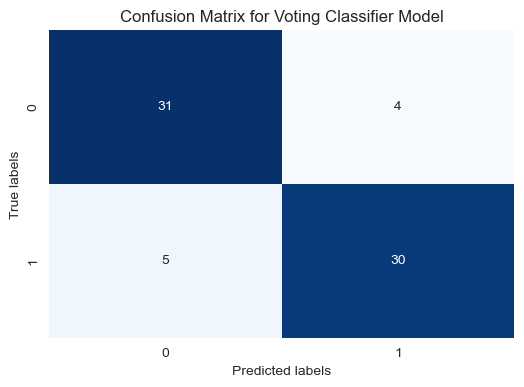


Accuracy Score: 0.8714285714285714

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.88      0.86      0.87        35

    accuracy                           0.87        70
   macro avg       0.87      0.87      0.87        70
weighted avg       0.87      0.87      0.87        70



In [154]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate the individual models
rf_clf = RandomForestClassifier()
svm_clf = SVC()  # No probability estimation needed for hard voting

# Create the Voting Classifier using hard voting
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('svm', svm_clf)
    ],
    voting='hard'  # Use hard voting
)

# Fit the Voting Classifier to the training data
voting_clf.fit(X_train, y_train)

# Predict and evaluate the combined model
voting_y_pred = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_y_pred)

# Compute the confusion matrix
voting_conf_matrix = confusion_matrix(y_test, voting_y_pred)

# Print out the metrics
plt.figure(figsize=(6, 4))
sns.heatmap(voting_conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Voting Classifier Model')
plt.show()

print("\nAccuracy Score:", accuracy_score(y_test, voting_y_pred))

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, voting_y_pred))


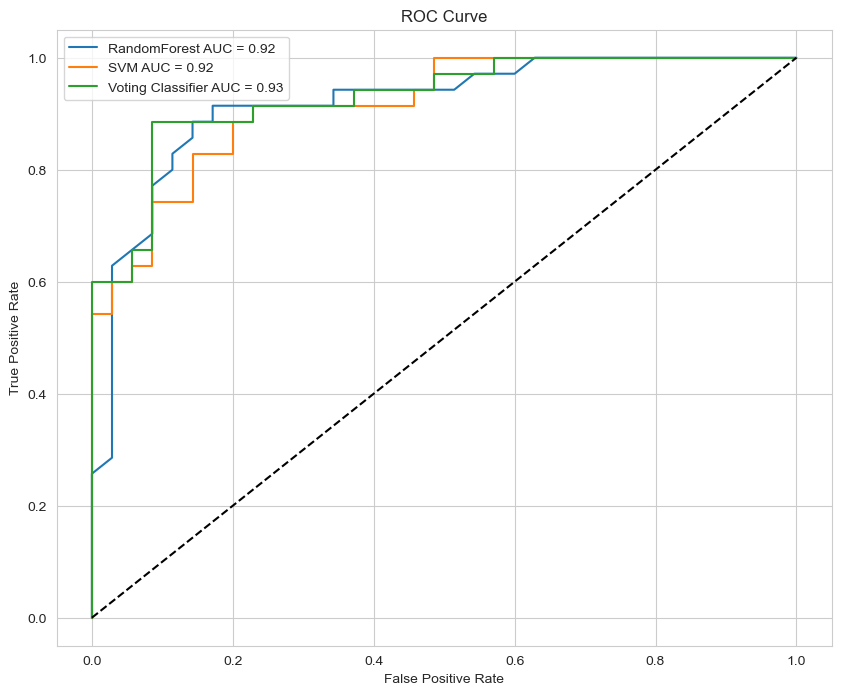

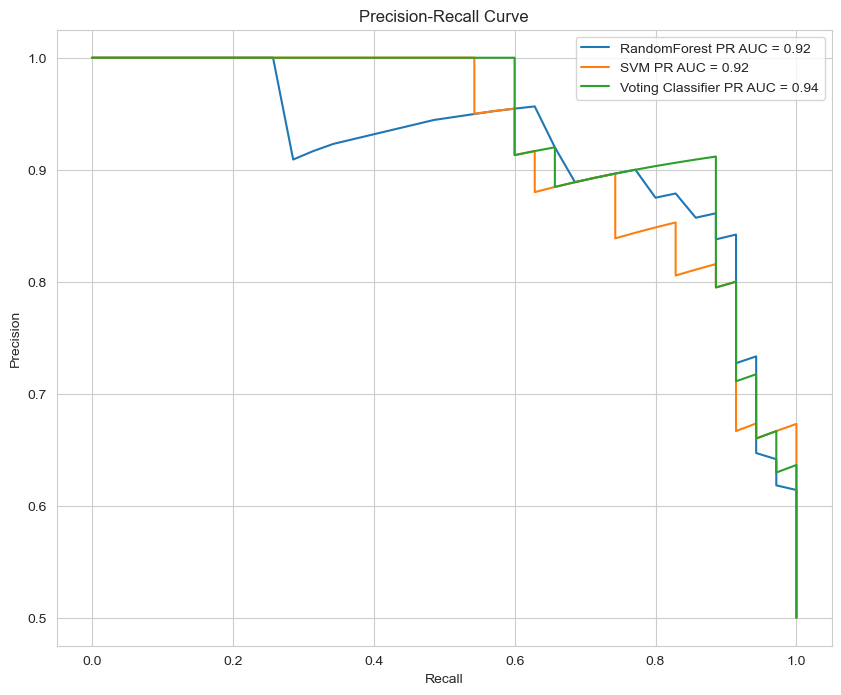

In [155]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Instantiate the individual models and the Voting Classifier
rf_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)  # SVM with probability estimation for ROC
voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('svm', svm_clf)],
    voting='soft'  # Use soft voting for ROC analysis
)

# Fit the classifiers with training data
rf_clf.fit(X_train, y_train)  # RandomForest
svm_clf.fit(X_train, y_train)  # SVM
voting_clf.fit(X_train, y_train)  # Voting Classifier

# RandomForest - ROC and Precision-Recall
rf_probs = rf_clf.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_pr_auc = auc(rf_recall, rf_precision)

# SVM - ROC and Precision-Recall
svm_probs = svm_clf.predict_proba(X_test)[:, 1]
svm_auc = roc_auc_score(y_test, svm_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
svm_pr_auc = auc(svm_recall, svm_precision)

# Voting Classifier - ROC and Precision-Recall
voting_probs = voting_clf.predict_proba(X_test)[:, 1]
voting_auc = roc_auc_score(y_test, voting_probs)
voting_fpr, voting_tpr, _ = roc_curve(y_test, voting_probs)

voting_precision, voting_recall, _ = precision_recall_curve(y_test, voting_probs)
voting_pr_auc = auc(voting_recall, voting_precision)

# Plotting ROC curves
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, label=f'RandomForest AUC = {rf_auc:.2f}')
plt.plot(svm_fpr, svm_tpr, label=f'SVM AUC = {svm_auc:.2f}')
plt.plot(voting_fpr, voting_tpr, label=f'Voting Classifier AUC = {voting_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plotting Precision-Recall curves
plt.figure(figsize=(10, 8))
plt.plot(rf_recall, rf_precision, label=f'RandomForest PR AUC = {rf_pr_auc:.2f}')
plt.plot(svm_recall, svm_precision, label=f'SVM PR AUC = {svm_pr_auc:.2f}')
plt.plot(voting_recall, voting_precision, label=f'Voting Classifier PR AUC = {voting_pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
